# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

Music has been my constant companion and the source of my greatest joy for the most part of my life. As a music lover myself, I found it challenging to select songs that align with my personal preferences, particularly when I traveled the last time to India during the flight journey. 

The internet and all the streaming applications have a huge collection of songs that make the choices overwhelming. We need a recommendation system that would engage the users and deliver content be it music, movies, or books according to the user’s interest and preferences. It can also help users discover new music, and help them with social connections. 

Recommendation systems do this by filtering and analyzing the past history of user choices, and then personlize the content to satisfy the user. These systems can design the model that is not biased towards certain artists, genres, languages or a discrete music style that promotes diversity and representation in the music industry.

### **The objective:**
To build recoemmndation model that suggests personalised songs that is more accurate.

### **The problem formulation**:
The use of efficient and accurate recommendation techniques is very important for a system that will provide good and useful recommendation to its individual users. This explains the importance of understanding the features and potentials of different data science recommendation algorithms.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/count_data.csv')
song_df = pd.read_csv('/content/drive/song_data.csv')


In [ ]:
count_df.shape

(2000000, 4)

In [ ]:
song_df.shape

(1000000, 5)

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
count_df

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [ ]:
count_df[count_df['play_count']<5].shape


(1676978, 4)

In [ ]:
# See the info of the song_df data
song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


#### **Observations and Insights:_____________**


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
print(df.count())
df = df.drop(['Unnamed: 0'],axis=1)
print(df.head())
print(df.count())

Unnamed: 0     2000000
user_id        2000000
song_id        2000000
play_count     2000000
title          2000000
release        2000000
artist_name    2000000
year           2000000
dtype: int64
                                    user_id             song_id  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995           1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B           2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0           1   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D           1   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273           1   

             title                        release    artist_name  year  
0         The Cove             Thicker Than Water   Jack Johnson     0  
1  Entre Dos Aguas            Flamenco Para Niños  Paco De Lucia  1976  
2         Stronger                     Graduation     Kanye West  2007  
3   Constellations              In B

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id']) 

df['song_id'] = le.fit_transform(df['song_id'])


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5

df_final=df_final[df_final['play_count'] > 5]
# df_final = __________

In [ ]:
# Check the shape of the data
df_final.head(10)


,user_id,song_id,play_count,title,release,artist_name,year
356,27018,198,20,Rorol,Identification Parade,Octopus Project,2002
359,27018,248,7,Auto-Dub,Skream!,Skream,2006
365,27018,318,11,Hilarious Movie Of The 90s,Pause,Four Tet,2001
386,27018,926,11,One Minute To Midnight,Justice,Justice,0
402,27018,1262,6,Lights & Music,Lights & Music,Cut Copy,2008
409,27018,1472,11,Neon Knights,The Looks,MSTRKRFT,2006
412,27018,1571,6,Hold The Ladder,One Ten Hundred Thousand Million,Octopus Project,2005
421,27018,1811,6,Ghosts 'n' Stuff (Original Instrumental Mix),Ghosts 'n' Stuff,Deadmau5,2009
431,27018,1936,6,Feel The Love,In Ghost Colours,Cut Copy,2008
453,27018,2615,8,She's Good For Business,The Looks,MSTRKRFT,2006


In [ ]:
df_final.to_csv("df_final_2.csv")

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

2187

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

555

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final.groupby(['user_id', 'song_id']).count()

play_count  title  release  artist_name  year
user_id song_id                                               
57      1188              1      1        1            1     1
84      2657              1      1        1            1     1
        2734              1      1        1            1     1
        4459              1      1        1            1     1
        7222              1      1        1            1     1
...                     ...    ...      ...          ...   ...
76331   4178              1      1        1            1     1
        5645              1      1        1            1     1
        8702              1      1        1            1     1
        8814              1      1        1            1     1
        9942              1      1        1            1     1

[12522 rows x 5 columns]

Most interacted users

In [ ]:
df_final.groupby(['user_id', 'song_id']).count()['play_count'].sum()


12522

#### **Observations and Insights:_______**


In [ ]:
df_final.groupby(['user_id', 'song_id']).count()['play_count'].sum()


12522

In [ ]:
 df_final['user_id'].value_counts()


22588    92
3237     74
29265    53
59974    52
31296    51
         ..
14208     1
7157      1
39233     1
28709     1
10826     1
Name: user_id, Length: 2187, dtype: int64

Songs played in a year

In [ ]:
 df_final['song_id'].value_counts()

317     273
352     254
614     248
7416    222
2220    215
       ... 
3101      1
3551      1
5300      1
5340      1
5115      1
Name: song_id, Length: 555, dtype: int64

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,586
2007,896
2008,1214
2009,1609
2010,395


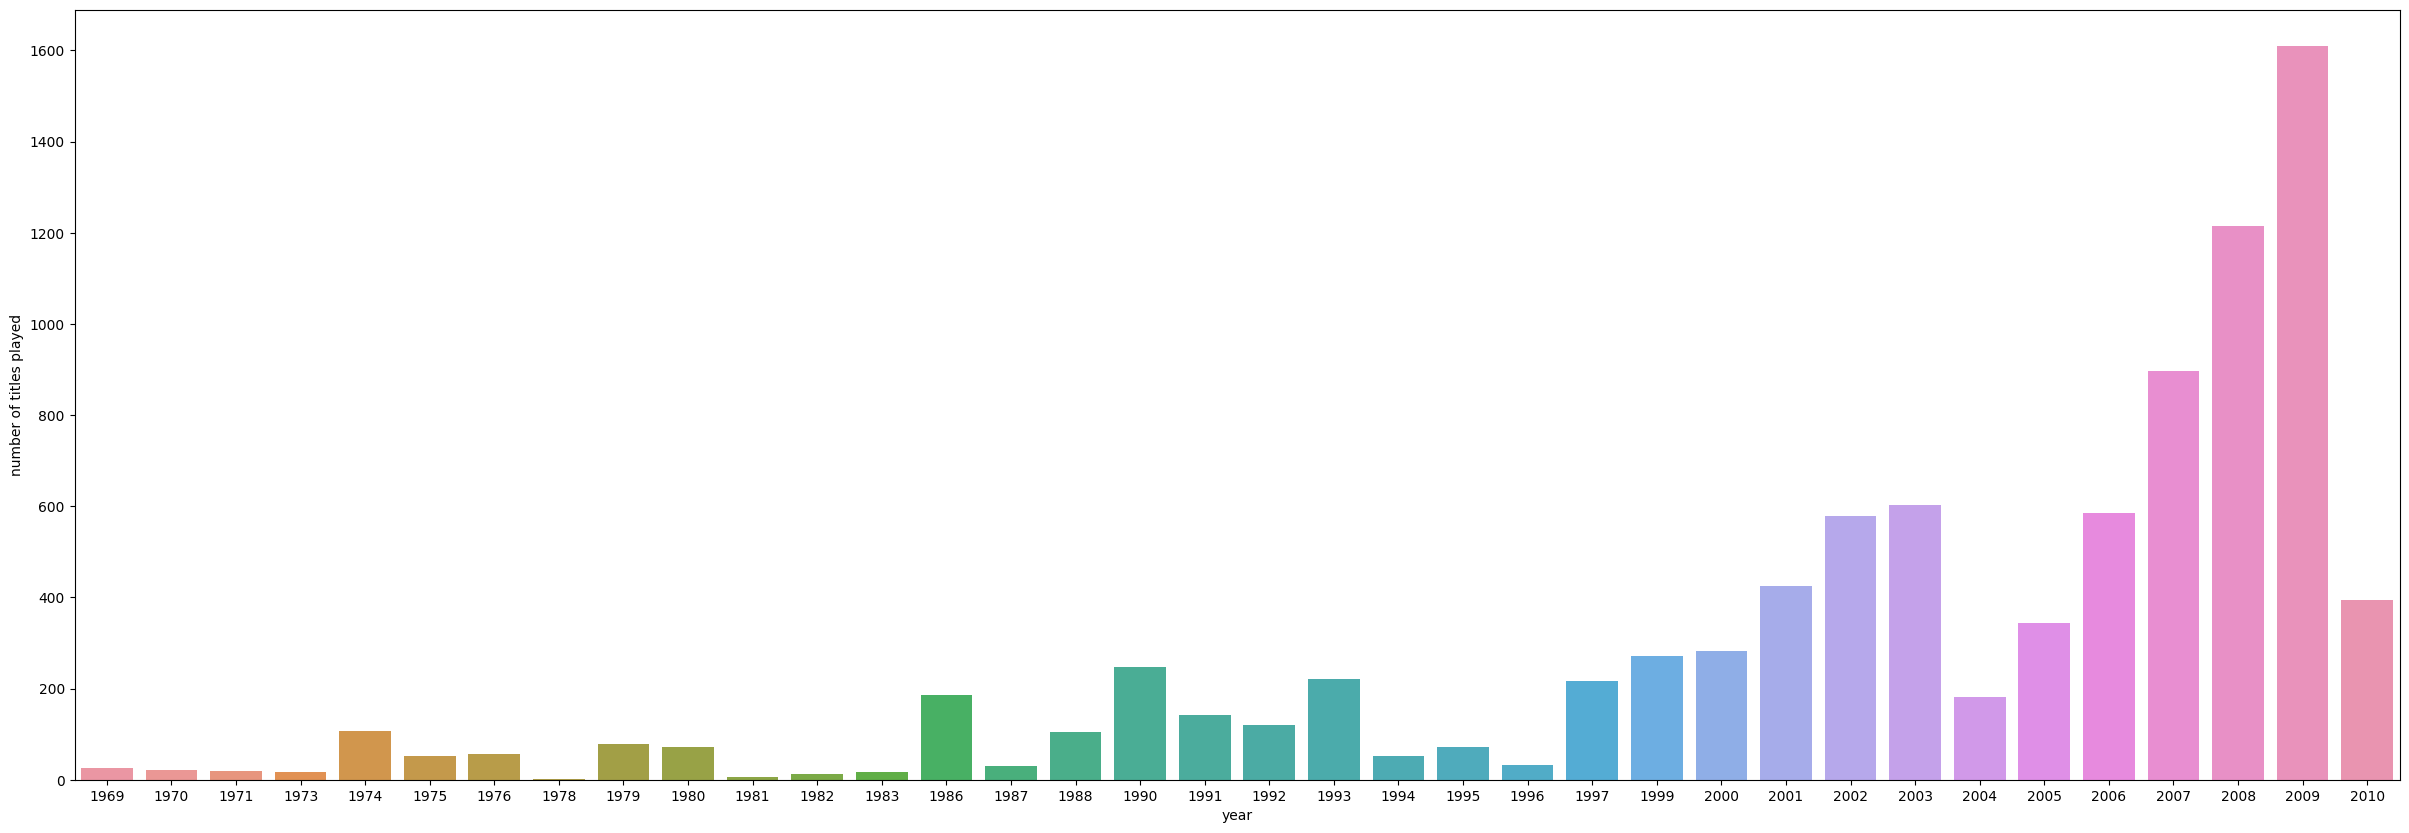

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:__________** # 

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby(['song_id']).mean()['play_count']    # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby(['song_id']).count() ['play_count']        # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count':average_count, 'play_freq':play_freq})


# Let us see the first five records of the final_play dataset
final_play.head(5)

,average_count,play_freq
song_id,,
21,10.176471,17
22,9.800000,5
52,10.125000,32
62,11.000000,12
93,9.909091,11


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def top_n_songs(data, n, min_interaction=100):
    
    # Finding books with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    # Sorting values w.r.t. average rating 
    recommendations = recommendations.sort_values(by='average_count', ascending=False)
    
    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 100))

[614, 317, 7913, 7416, 6246, 1664, 3074, 5645, 617, 4858]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
# !pip install surprise 
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195803 sha256=86f14dd13895849155db051c2a43a854b01c4d534493dffdf2505071a9f58351
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale = (0, 5))   #use rating scale (0, 5)


# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id','play_count']], reader) 

# Take only "user_id","song_id", and "play_count"


# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name':'cosine' ,
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user)



RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


**Observations and Insights:_________**

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671


user: 6958       item: 1671       r_ui = 2.00   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=2, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958,3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

13.943298509106775
{'k': 10, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 10, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


**Observations and Insights:_________**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=2, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = False)

Prediction(uid=6958, iid=1671, r_ui=2, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(4, k = 5)

[64, 109, 116, 349, 364]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended movie IDs
    recommendations = []
    
    # Creating an user-item interactions matrix 
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those song IDs which the userId has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the movie IDs which userId has not interacted yet
    for item_id in non_interacted_songs:
        
        # Predicting the ratings for those non interacted movie IDs by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating movies for this user
    return recommendations[:top_n]
    

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine

recommendations = get_recommendations(df_final, 27018, 5, sim_user_user_optimized)
recommendations


[(21, 5), (22, 5), (52, 5), (62, 5), (93, 5)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"

pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,21,5
1,22,5
2,52,5
3,62,5
4,93,5


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs =ranked_songs.sort_values('corrected_ratings', ascending = False)
    
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,52,32,5,4.823223
1,21,17,5,4.757464
2,62,12,5,4.711325
3,93,11,5,4.698489
4,22,5,5,4.552786


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


**Observations and Insights:______________**

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=4, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(4, 1671, verbose = True)

user: 4          item: 1671       r_ui = None   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=4, iid=1671, r_ui=None, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



13.945604736688983
{'k': 10, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)


RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


**Observations and Insights:______________**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=4, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 1671, verbose = True)

user: 6958       item: 1671       r_ui = None   est = 5.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=None, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[120, 159, 29, 66, 101]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 27018, 5, sim_item_item_optimized)
recommendations

[(21, 5), (22, 5), (52, 5), (62, 5), (93, 5)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,21,5
1,22,5
2,52,5
3,62,5
4,93,5


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,52,32,5,4.823223
1,21,17,5,4.757464
2,62,12,5,4.711325
3,93,11,5,4.698489
4,22,5,5,4.552786


**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=5, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(4, 3232, verbose = True)

user: 4          item: 3232       r_ui = None   est = 5.00   {'was_impossible': False}


Prediction(uid=4, iid=3232, r_ui=None, est=5, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



13.951038011622144
{'n_epochs': 10, 'lr_all': 0.001, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
# Building the optimized SVD model using optimal hyperparameters search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 13.0241
Precision:  1.0
Recall:  1.0
F_1 score:  1.0


**Observations and Insights:_________**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=5, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=5, details={'was_impossible': False})

In [ ]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year
356,27018,198,20,Rorol,Identification Parade,Octopus Project,2002
359,27018,248,7,Auto-Dub,Skream!,Skream,2006
365,27018,318,11,Hilarious Movie Of The 90s,Pause,Four Tet,2001
386,27018,926,11,One Minute To Midnight,Justice,Justice,0
402,27018,1262,6,Lights & Music,Lights & Music,Cut Copy,2008
...,...,...,...,...,...,...,...
1999409,47786,1348,7,Mia,First Love,Emmy The Great,2007
1999445,47786,2192,8,Heartbreakin' Wreck,Modbilly,The Boxmasters,2009
1999522,47786,4178,6,Natural Anthem (Album),Give Up,Postal Service,2003
1999633,47786,6721,6,Songs Of The Season,Hell Train,Soltero,0


**Observations and Insights:_________**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 27018, 5, svd_optimized)
list (svd_recommendations)

[(21, 5), (22, 5), (52, 5), (62, 5), (93, 5)]

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,52,32,5,4.823223
1,21,17,5,4.757464
2,62,12,5,4.711325
3,93,11,5,4.698489
4,22,5,5,4.552786


**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the Songs dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

clust_baseline = CoClustering(random_state = 1)

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 12.7467
Precision:  0.995
Recall:  0.993
F_1 score:  0.994


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=5, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user

clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=5, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


14.016289809700192
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 12.7409
Precision:  0.997
Recall:  0.994
F_1 score:  0.995


**Observations and Insights:_________**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671

clust_tuned.predict(6958,1671 , r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=5, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958,3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 5.00   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=5, details={'was_impossible': False})

**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations =  get_recommendations(df_final, 27018, 5, clust_tuned)
list(clustering_recommendations)

[(21, 5), (62, 5), (93, 5), (97, 5), (118, 5)]

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,97,26,5,4.803884
1,21,17,5,4.757464
2,62,12,5,4.711325
3,93,11,5,4.698489
4,118,9,5,4.666667


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
356,27018,198,20,Rorol,Identification Parade,Octopus Project,2002,Rorol Identification Parade Octopus Project
359,27018,248,7,Auto-Dub,Skream!,Skream,2006,Auto-Dub Skream! Skream
365,27018,318,11,Hilarious Movie Of The 90s,Pause,Four Tet,2001,Hilarious Movie Of The 90s Pause Four Tet
386,27018,926,11,One Minute To Midnight,Justice,Justice,0,One Minute To Midnight Justice Justice
402,27018,1262,6,Lights & Music,Lights & Music,Cut Copy,2008,Lights & Music Lights & Music Cut Copy


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()



,user_id,song_id,play_count,text
title,,,,
Rorol,27018,198,20,Rorol Identification Parade Octopus Project
Auto-Dub,27018,248,7,Auto-Dub Skream! Skream
Hilarious Movie Of The 90s,27018,318,11,Hilarious Movie Of The 90s Pause Four Tet
One Minute To Midnight,27018,926,11,One Minute To Midnight Justice Justice
Lights & Music,27018,1262,6,Lights & Music Lights & Music Cut Copy


In [ ]:
# Let us see the shape of final_ratings data
df_small.shape


(553, 4)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer 

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array

tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.45512057],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45512057,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    indices = pd.Series(df_small.index)

        # Getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]
    
    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[246, 362, 360, 120, 473, 375, 374, 373, 372, 365]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'That Should Be Me',
 'Swing Life Away',
 'Stronger',
 'Ms. Jackson',
 'Songs Of The Season']

**Observations and Insights:_________**

## **Conclusion and Recommendations**

Here we built the recommendation systems. They are as follows:

*   Popularity based recommendation systems
*   clustering-based recommendation systems
*   content-based recommendation systems

To demonstrate clustering-based recommendation systems, surprise library has been used. Grid search cross-validation is applied to find the best working model, and with that the corresponding predictions are made.

To evaluate the performance of these models, precision@k and recall@k are used in this case study. Using these two metrics F_1 score is calculated for each working model.
We can try to improve the performance of these models using hyperparameter tuning.

Recommendations for implementation - Proposed Solution Design :
Since we do not have explicit feedback from the user, such as "user rating,likes" we will need to account from more of the user's implicit feedback. We will use play count data points to measure the user's interest in the song the user is listening to.We propose a rating estimation method to infer user ratings from the user's implicit feedback.We will then use the estimated rating in various recommendation models and pick thebest-performing model. We expect the model to perform nicely and generate a personalised top 10 songs for each user.

Further analysis /Next step
Although the precision score has shown great promise, the result is not perfect. There is a limitation with the current dataset in which we can improve the recommendation model's performance. Next step, we are keen to collect more implicit feedback data and explicit feedback. An example of implicit data could be the duration the user listens to the songs. An example of explicit feedback data is simply the user's explicit rating to express the user's affinity to the songs. Withthese additional datasets, the model would improve better.

Music has always been known to change people's moods. Capturing and recognizing a person's emotion and displaying appropriate songs matching the person's mood can gradually calm their mind and end up giving a pleasing effect. People express their emotions primarily through their facial expressions. Our proposed system should aim to capture a person's emotion through facial expressions. The user's current emotion is used to generate an automatic music playlist on top of recoemmendation engine based on playcount & user rating.